In [109]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("stroke.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int32(4), int64(3)
memory usage: 319.5 KB


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum() #check null value

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'].mean()

28.893236911794673

In [7]:
df['bmi'].fillna(value=df["bmi"].mean(), inplace=True)
df["bmi"]=df["bmi"].round(1)

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["ever_married"] = le.fit_transform(df["ever_married"])
df["Residence_type"] = le.fit_transform(df["Residence_type"])
df["work_type"] = le.fit_transform(df["work_type"])

In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [11]:
df[df["smoking_status"] == "Unknown"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,0,59.0,0,0,1,Private,0,76.15,28.9,Unknown,1
9,60491,0,78.0,0,0,1,Private,1,58.57,24.2,Unknown,1
13,8213,1,78.0,0,1,1,Private,1,219.84,28.9,Unknown,1
19,25226,1,57.0,0,1,0,Govt_job,1,217.08,28.9,Unknown,1
23,64778,1,82.0,0,1,1,Private,0,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,1,9.0,0,0,0,children,1,71.88,17.5,Unknown,0
5101,36901,0,45.0,0,0,1,Private,1,97.95,24.5,Unknown,0
5103,22127,0,18.0,0,0,0,Private,1,82.85,46.9,Unknown,0
5104,14180,0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0


In [12]:
df.drop(["id","smoking_status"], axis=1, inplace=True)

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.9,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,1


In [14]:
df["work_type"] = le.fit_transform(df["work_type"])

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.9,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1
3,0,49.0,0,0,1,2,1,171.23,34.4,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1


In [16]:
X = df.drop("stroke", axis=1)

In [17]:
X = df.drop("stroke", axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,1,67.0,0,1,1,2,1,228.69,36.6
1,0,61.0,0,0,1,3,0,202.21,28.9
2,1,80.0,0,1,1,2,0,105.92,32.5
3,0,49.0,0,0,1,2,1,171.23,34.4
4,0,79.0,1,0,1,3,0,174.12,24.0
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.9
5106,0,81.0,0,0,1,3,1,125.20,40.0
5107,0,35.0,0,0,1,3,0,82.99,30.6
5108,1,51.0,0,0,1,2,0,166.29,25.6


In [18]:
y = df["stroke"]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

In [95]:
model_MLP = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', max_iter=300)

In [96]:
model_MLP.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=300)

In [97]:
MLP_predict = model_MLP.predict(X_test)

In [98]:
model_MLP.score(X_test, y_test)

0.9549902152641878

In [99]:
cm_NN = confusion_matrix(y_test,MLP_predict)
print(cm_NN)

[[1464    0]
 [  69    0]]


In [94]:
print(classification_report(y_test,MLP_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [62]:
df[df["stroke"] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.9,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1
3,0,49.0,0,0,1,2,1,171.23,34.4,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0,0,1,2,0,84.96,36.7,1
245,0,14.0,0,0,0,4,0,57.93,30.9,1
246,0,75.0,0,0,1,3,0,78.80,29.3,1
247,1,71.0,1,0,1,3,0,87.80,28.9,1


In [30]:
df.shape

(5110, 10)

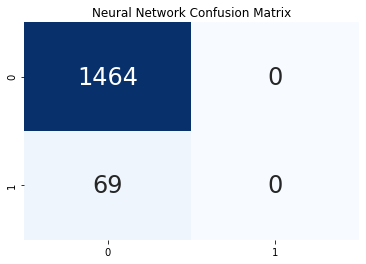

In [108]:
cm_NN = confusion_matrix(y_test,MLP_predict)
plt.title("Neural Network Confusion Matrix")
sns.heatmap(cm_NN,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()